<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# ** Laboratorio práctico de práctica: disputas de datos **

Se necesita tiempo estimado: ** 30 ** minutos

En este laboratorio, utilizará las habilidades adquiridas en el módulo y abordará los problemas de manejo de los datos faltantes, corrija el tipo de datos del atributo DataFrame y ejecutará los procesos de estandarización de datos y la normalización de datos en atributos específicos del conjunto de datos.

# Objetivos

Después de completar este laboratorio, podrá:

- manejar los datos faltantes de diferentes maneras
- Corrija el tipo de datos de diferentes valores de datos según el requisito
- Estandarizar y normalizar los atributos de datos apropiados
- Visualice los datos como gráfico de barras agrupado usando binning
- Cnvertir un datos categóricos en variables indicadoras numéricas

# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` to download the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Download the updated dataset by running the cell below.

The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

To obtain the dataset, utilize the download() function as defined above:


In [ ]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

First we load data into a `pandas.DataFrame`:


In [3]:
df = pd.read_csv(file_path, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
#df = pd.read_csv(filepath, header=None)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [5]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Tenga en cuenta que podemos actualizar la columna `screen_size_cm` de modo que todos los valores se redondean a los 2 decimales más cercanos usando` numpy.round () `

In [6]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Tarea - 1

### Evaluar el conjunto de datos para los datos faltantes
Los datos faltantes se convirtieron por última vez en '?'a numpy.nan.Pandas usa valores NAN y NULL indistintamente.Esto significa que puede identificar las entradas que tienen valores nulos.Escriba un código que identifique qué columnas tienen datos faltantes.

In [9]:
# Write your code below and press Shift+Enter to execute 
def Count_nulls():
    countnan = df.isnull().sum()
    return countnan[countnan > 0]
Count_nulls()

Screen_Size_cm    4
Weight_kg         5
dtype: int64

In [11]:
from dataclasses import dataclass

@dataclass
class A:
    Unnamed_0: str = "Unnamed: 0"
    Manufacturer: str = "Manufacturer"
    Category: str = "Category"
    Screen: str = "Screen"
    GPU: str = "GPU"
    OS: str = "OS"
    CPU_core: str = "CPU_core"
    Screen_Size_cm: str = "Screen_Size_cm"
    CPU_frequency: str = "CPU_frequency"
    RAM_GB: str = "RAM_GB"
    Storage_GB_SSD: str = "Storage_GB_SSD"
    Weight_kg: str = "Weight_kg"
    Price: str = "Price"


<details><summary>Click here for the solution</summary>

```python
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
```

</details>


# Tarea - 2

### Reemplazar con la media
Los valores faltantes en los atributos que tienen datos continuos se reemplazan mejor utilizando el valor medio.Observamos que los valores en el atributo "weight_kg" son de naturaleza continua, y faltan algunos valores.Por lo tanto, escriba un código para reemplazar los valores de peso faltantes con el valor promedio del atributo.

In [14]:
# Write your code below and press Shift+Enter to execute
mean_Weight_kg = df[A.Weight_kg].astype('float').mean()
mean_Weight_kg

df[A.Weight_kg] = df[A.Weight_kg].replace(np.nan,mean_Weight_kg)

Count_nulls()

Screen_Size_cm    4
dtype: int64

<details>
    <summary>Click here for the solution</summary>
    
```python
# replacing missing data with mean
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row.
```

</details>


### reemplazar con el valor más frecuente
Los valores faltantes en los atributos que tienen datos categóricos se reemplazan mejor utilizando el valor más frecuente.Observamos que los valores en el atributo "Screen_Size_CM" son de naturaleza categórica, y faltan algunos valores.Por lo tanto, escriba un código para reemplazar los valores faltantes del tamaño de la pantalla con el valor más frecuente del atributo.

In [17]:
# Write your code below and press Shift+Enter to execute
freq = df[A.Screen_Size_cm].value_counts().idxmax()

df[A.Screen_Size_cm] = df[A.Screen_Size_cm].replace(np.nan, freq)

Count_nulls()

Series([], dtype: int64)

<details>
    <summary>Click here for the solution</summary>
    
```python
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)
```
</details>


# Tarea - 3

### arreglo los tipos de datos
Tanto "Weight_kg" como "Screen_Size_CM" tienen el tipo de datos "objeto", mientras que ambos deberían tener un tipo de datos de "flotación".Escriba un código para corregir el tipo de datos de estas dos columnas.

In [20]:
# Write your code below and press Shift+Enter to execute
df[[A.Weight_kg, A.Screen_Size_cm]] =  df[[A.Weight_kg, A.Screen_Size_cm]].astype('float')


<details>
    <summary>Click here for Solution</summary>

```python
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
```

</details>


# Tarea - 4

### Estandarización de datos
El valor de Screen_Size generalmente tiene una unidad estándar de pulgadas.Del mismo modo, se necesita peso de la computadora portátil para estar en libras.Use las unidades de conversión mencionadas a continuación y escriba un código para modificar las columnas del marco de datos en consecuencia.Actualizar sus nombres también.

`` `{matemáticas}
1 pulgada = 2.54 cm
1 kg = 2.205 libras
`` `` ``

In [22]:
# Write your code below and press Shift+Enter to execute
df[[A.Weight_kg, A.Screen_Size_cm]].head()

,Weight_kg,Screen_Size_cm
0,1.60,35.56
1,2.20,39.62
2,2.20,39.62
3,1.22,33.78
4,1.91,39.62


In [27]:
df['weight_lb'] =  df[A.Weight_kg] * 2.205
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,weight_pg,weight_lb
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,0.725624,3.52800
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,0.997732,4.85100
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,0.997732,4.85100
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,0.553288,2.69010
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,0.866213,4.21155


<details>
    <summary>Click here for Solution</summary>

```python
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)
```
</details>


In [35]:
df['Screen_Size_pg'] =  df[A.Screen_Size_cm] /2.54
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,weight_lb,Screen_Size_pg
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.551724,8,256,1.60,978,3.52800,14.000000
1,1,Dell,3,Full HD,1,1,3,39.62,0.689655,4,256,2.20,634,4.85100,15.598425
2,2,Dell,3,Full HD,1,1,7,39.62,0.931034,8,256,2.20,946,4.85100,15.598425
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.551724,8,128,1.22,1244,2.69010,13.299213
4,4,HP,4,Full HD,2,1,7,39.62,0.620690,8,256,1.91,837,4.21155,15.598425


In [31]:
df.drop(columns=['weight_pg'], inplace=True)

### Normalización de datos
A menudo se requiere normalizar un atributo de datos continuos.Escriba un código para normalizar el atributo "CPU_Frequency" con respecto al valor máximo disponible en el conjunto de datos.

In [34]:
# Write your code below and press Shift+Enter to execute
df[A.CPU_frequency]= df[A.CPU_frequency]/df[A.CPU_frequency].max()

<details>
    <summary>Click here for Solution</summary>

```python
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
```
</details>


# Tarea - 5

### binning
El binning es un proceso de creación de un atributo categórico que divide los valores de un datos continuos en un número específico de grupos.En este caso, escriba un código para crear 3 contenedores para el atributo "precio".Estos contenedores se llamarían "bajo", "medio" y "alto".El nuevo atributo se nombrará "Price-Binned".

In [37]:
# Write your code below and press Shift+Enter to execute
bining_names=['low','medium','high']
bins = np.linspace(min(df[A.Price]), max(df[A.Price]), 4)
df['price-binned'] = pd.cut(df[A.Price], bins, labels=bining_names, include_lowest=True )
df[[A.Price,'price-binned']].head(10)

,Price,price-binned
0,978,low
1,634,low
2,946,low
3,1244,low
4,837,low
5,1016,low
6,1117,low
7,866,low
8,812,low
9,1068,low


In [39]:
df['price-binned'].value_counts()

price-binned
low       160
medium     72
high        6
Name: count, dtype: int64

<details>
    <summary>Click here for Solution</summary>

```python
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
```
</details>


Además, traza el gráfico de barras de estos contenedores.

(array([160.,  72.,   6.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

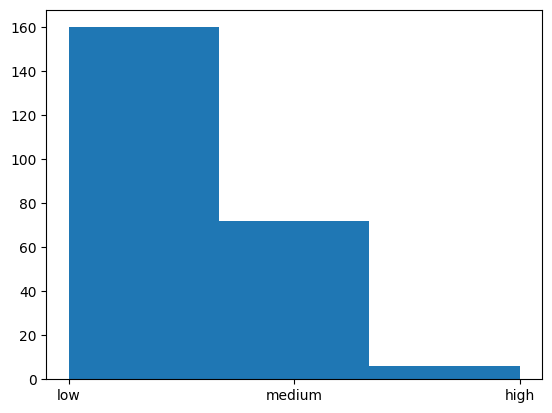

In [43]:
# Write your code below and press Shift+Enter to execute
import matplotlib as plt
from matplotlib import pyplot

pyplot.hist(df['price-binned'],bins=3)

<details>
    <summary>Click here for Solution</summary>

```python
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
```
</details>


# Tarea - 6

### Variables indicadoras
Convierta el atributo "pantalla" del conjunto de datos en 2 variables indicadoras, "Screen-IPS_Panel" y "Screen-Full_HD".Luego suelte el atributo "pantalla" del conjunto de datos.

In [50]:
# Write your code below and press Shift+Enter to execute
dummy_variable_1 = pd.get_dummies(df[A.Screen])
dummy_variable_1.head()


,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [55]:
dummy_variable_1.rename(columns={'Full HD':'screen-type-FHD', 'IPS Panel':'screen-type-IPS'}, inplace=True)
dummy_variable_1.head()

,screen-type-FHD,screen-type-IPS
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [58]:
df = pd.concat([df, dummy_variable_1], axis=1)

<details>
    <summary>Click here for Solution</summary>

```python
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)
```

</details>


Esta versión del conjunto de datos, ahora finalizada, es la que usará en todos los módulos posteriores.

Imprima el contenido de DataFrame.head () para verificar los cambios que se hicieron en el conjunto de datos.

In [61]:
df.drop(columns=['screen-type-FHD','screen-type-IPS'], inplace=True)

In [62]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,weight_lb,Screen_Size_pg,price-binned,Full HD,IPS Panel
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.551724,8,256,1.60,978,3.52800,14.000000,low,False,True
1,1,Dell,3,Full HD,1,1,3,39.62,0.689655,4,256,2.20,634,4.85100,15.598425,low,True,False
2,2,Dell,3,Full HD,1,1,7,39.62,0.931034,8,256,2.20,946,4.85100,15.598425,low,True,False
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.551724,8,128,1.22,1244,2.69010,13.299213,low,False,True
4,4,HP,4,Full HD,2,1,7,39.62,0.620690,8,256,1.91,837,4.21155,15.598425,low,True,False


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised| --!>
